# IMPORTAÇÃO DE BIBLIOTECAS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# IMPORTAÇÃO DE DADOS

In [2]:
weather = pd.read_csv('D:\development\masterDegree\SIN5007\DATA\weatherAUS.csv').sort_values(by=['Date', 'Location'], ascending=True)
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
45587,2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,68.0,29.0,1019.7,1015.0,7.0,7.0,14.4,23.6,No,Yes
45588,2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,80.0,36.0,1012.4,1008.4,5.0,3.0,17.5,25.7,Yes,Yes
45589,2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,82.0,69.0,1009.5,1007.2,8.0,7.0,15.4,20.2,Yes,Yes
45590,2007-11-04,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,62.0,56.0,1005.5,1007.0,2.0,7.0,13.5,14.1,Yes,Yes
45591,2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,68.0,49.0,1018.3,1018.5,7.0,7.0,11.1,15.4,Yes,No


# ENTENDIMENTO DOS DADOS

## VOLUMETRIA

In [3]:
print(f"Linhas: {weather.shape[0]:,} | Colunas: {weather.shape[1]}")

Linhas: 145,460 | Colunas: 23


## REMOÇÃO DE NULOS

In [5]:
nulos = weather.isnull().sum().reset_index().rename(columns={'index': 'Coluna', 0: 'Valores Nulos'})
nulos['Porcentagem'] = nulos['Valores Nulos'] / weather.shape[0] * 100
nulos = nulos.sort_values(by='Porcentagem', ascending=False)
print(f"Existem {nulos['Valores Nulos'].sum():,} no Dataset considerando todas as Variáveis")
nulos

Existem 343,248 no Dataset considerando todas as Variáveis


,Coluna,Valores Nulos,Porcentagem
6,Sunshine,69835,48.009762
5,Evaporation,62790,43.166506
18,Cloud3pm,59358,40.807095
17,Cloud9am,55888,38.421559
15,Pressure9am,15065,10.356799
16,Pressure3pm,15028,10.331363
9,WindDir9am,10566,7.263853
7,WindGustDir,10326,7.098859
8,WindGustSpeed,10263,7.055548
14,Humidity3pm,4507,3.098446


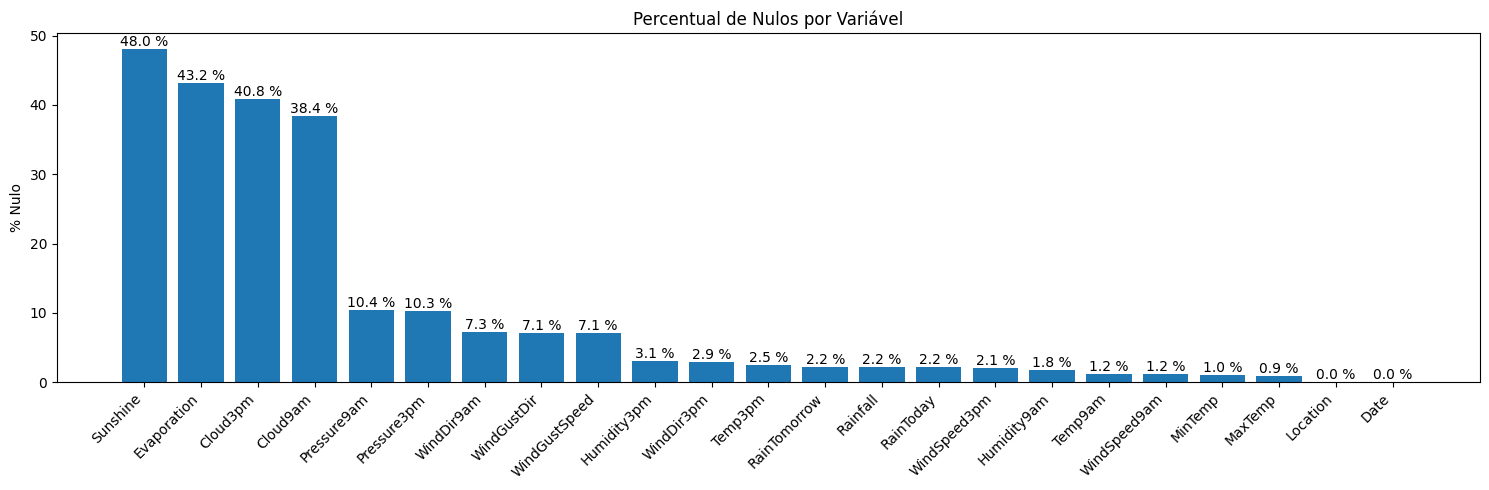

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
bar_container = ax.bar(nulos['Coluna'], nulos['Porcentagem'])
ax.set(ylabel='% Nulo', title='Percentual de Nulos por Variável')
ax.bar_label(bar_container, fmt=lambda x: f'{x * 1:.1f} %')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show();

In [11]:
weather_clean = weather.dropna()
print(f"Linhas SEM NULOS: {int(weather_clean.shape[0]):,} | Colunas: {weather_clean.shape[1]}")

Linhas SEM NULOS: 56,420 | Colunas: 23


## TRANSFORMAÇÃO DAS VARIÁVEIS ALVO

In [ ]:
weather.loc[:, 'Date']= pd.to_datetime(weather.Date)
weather.loc[:, 'RainToday']= weather.RainToday.map({'Yes': 1, 'No': 0})
weather.loc[:, 'RainTomorrow']= weather.RainTomorrow.map({'Yes': 1, 'No': 0})

In [12]:
weather_clean.loc[:, 'Date'] = pd.to_datetime(weather_clean.Date)
weather_clean.loc[:, 'RainToday'] = weather_clean.RainToday.map({'Yes': 1, 'No': 0})
weather_clean.loc[:, 'RainTomorrow'] = weather_clean.RainTomorrow.map({'Yes': 1, 'No': 0})

## TIPOS DE DADOS

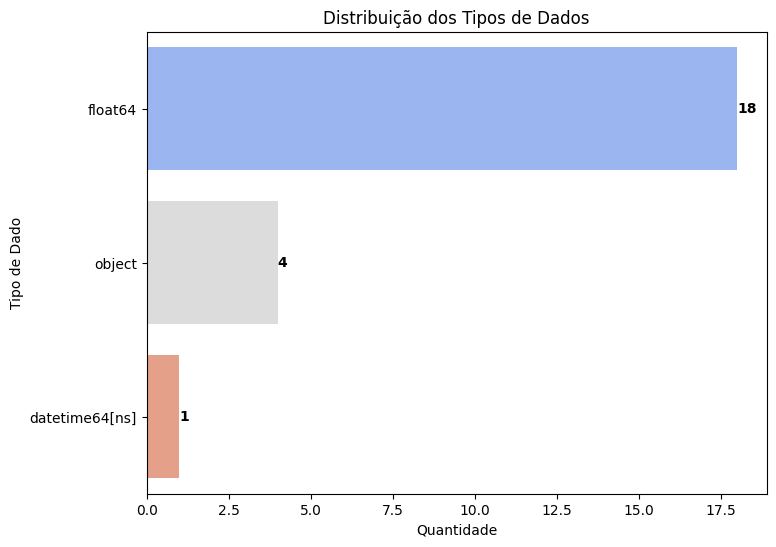

In [17]:
data_types = weather.dtypes.value_counts().reset_index()
data_types.columns = ['Data Type', 'Count']

# Visualizar a distribuição dos tipos de dados
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Count', y='Data Type', data=data_types, hue='Data Type', palette='coolwarm')
plt.title('Distribuição dos Tipos de Dados')
plt.xlabel('Quantidade')
plt.ylabel('Tipo de Dado')

# Adicionando os valores nas barras
for index, value in enumerate(data_types['Count']):
    ax.text(value, index, f'{value}', va='center', ha='left', color='black', fontweight='bold')

plt.show();


## DISTRIBUIÇÃO DOS DADOS

In [18]:
numerical_columns = weather.select_dtypes(include=["int64", "float64"])